# **UTS Machine Learning_Clasification XGboost_Milk Quality**
Nama: Rizki Hidayat

NIM: 1103202131

Dataset: [*Milk Quality*](https://www.kaggle.com/datasets/cpluzshrijayan/milkquality/)

Model: Clasification XGBoost

**XGBoost (Extreme Gradient Boosting)** adalah algoritma penguatan gradien yang sangat efisien dan populer untuk tugas klasifikasi, regresi, dan perankingan. Dengan menggabungkan sejumlah besar model lemah menjadi model yang kuat, XGBoost mengatasi masalah overfitting melalui regularisasi dan menyediakan penanganan otomatis untuk nilai yang hilang. Kecepatan dan paralelisme dirancang untuk menangani data yang besar, sementara kemampuan interpretasi tetap dipertahankan. XGBoost juga memperkenalkan inovasi seperti penanganan kelas tidak seimbang dan fitur kategori. Penggunaannya relatif mudah dengan sintaksis dan parameter-parameter yang dapat disesuaikan memungkinkan pengoptimalan kinerja model.

## Load dataset dari GDrive
Promp ChatGPT:
berikan code untuk membaca dataset google drive dengan path "/content/drive/MyDrive/Dataset/MilkQuality.csv" di google colab

In [205]:
# Menghubungkan Google Drive ke Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report

In [52]:

# Path ke file CSV di Google Drive
file_path = "/content/drive/MyDrive/Dataset/MilkQuality.csv"

# Membaca file CSV menjadi DataFrame menggunakan Pandas
df = pd.read_csv(file_path)
df

,pH,Temprature,Taste,Odor,Fatty,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


Dari data frame diatas kita tahu data kita memiliki 1059 baris dan 8 kolom

## EDA (Exploratory Data Analysis)

Promp ChatGPT:Jelaskan pengertian EDA dan berikan langkah langkah EDA untuk dataset

---
Exploratory Data Analysis (EDA) adalah proses analisis awal yang dilakukan pada dataset untuk memahami karakteristik, pola, dan hubungan antar variabel.

In [211]:
# Menampilkan 7 data pertama dari DataFrame
print(df.head())

    pH  Temprature  Taste  Odor  Fatty   Turbidity  Colour  Grade
0  6.6          35      1     0       1          0     254      0
1  6.6          36      0     1       0          1     253      0
2  8.5          70      1     1       1          1     246      1
3  9.5          34      1     1       0          1     255      1
4  6.6          37      0     0       0          0     255      2


In [212]:
#Menampilkan informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fatty       1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 66.3 KB


Dari informasi dataset diatas kita mengetahui dari 8 kolom, dan setiap kolomnya memiliki 1059 data non-null (tidak kosong) alias semua data terisi. Dan dari informasi diatas kita mengetahui kita memiliki 1 data tipe float, 6 data tipe interger, dan 1 data tipe object

In [213]:
#menampilkan statistik dari dataset yang digunakan
print(df.describe())

                pH   Temprature        Taste         Odor       Fatty   \
count  1059.000000  1059.000000  1059.000000  1059.000000  1059.000000   
mean      6.630123    44.226629     0.546742     0.432483     0.671388   
std       1.399679    10.098364     0.498046     0.495655     0.469930   
min       3.000000    34.000000     0.000000     0.000000     0.000000   
25%       6.500000    38.000000     0.000000     0.000000     0.000000   
50%       6.700000    41.000000     1.000000     0.000000     1.000000   
75%       6.800000    45.000000     1.000000     1.000000     1.000000   
max       9.500000    90.000000     1.000000     1.000000     1.000000   

         Turbidity       Colour        Grade  
count  1059.000000  1059.000000  1059.000000  
mean      0.491029   251.840415     1.111426  
std       0.500156     4.307424     0.763568  
min       0.000000   240.000000     0.000000  
25%       0.000000   250.000000     1.000000  
50%       0.000000   255.000000     1.000000  
75% 

Keterangan:

Count = Jumlah yang diamati

mean = Rata-rata

std = standar deviasi

min = nilai minimum

25% = kuartil bawah / Q1  

50% = median / Q2

75% = kuartil atas / Q3

max = nilai maksimum

In [214]:
# Menampilkan jumlah nilai yang hilang pada setiap kolom
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fatty         0
Turbidity     0
Colour        0
Grade         0
dtype: int64

Dari informasi diatas tidak ada nilai yang hilang

## Data Visualization

Promp ChatGPT: Jelaskan data visualization dan jenis jenisnya


Data visualization, atau visualisasi data, adalah teknik representasi grafis data untuk mendapatkan wawasan dan pemahaman yang lebih baik tentang pola, hubungan, dan tren dalam dataset. Berbagai jenis visualisasi data dapat digunakan tergantung pada sifat data dan pertanyaan yang ingin dijawab. Berikut adalah beberapa jenis visualisasi data yang umum digunakan:

1. Histogram: Menggambarkan distribusi frekuensi dari variabel numerik.
Berguna untuk melihat pola distribusi, kecenderungan sentral, dan dispersi data.


2. Diagram Pencar (Scatter Plot): Menunjukkan hubungan antara dua variabel numerik.
Berguna untuk mengidentifikasi pola korelasi dan outliers.


3. Diagram Garis (Line Chart): Menunjukkan perubahan nilai variabel melalui waktu atau urutan.
Cocok untuk melihat tren dan pola waktu.

4. Diagram Kotak (Box Plot): Menunjukkan distribusi statistik ringkasan, termasuk kuartil dan outliers.
Berguna untuk analisis perbandingan dan identifikasi outliers.


5. Diagram Batang (Bar Chart): Menunjukkan frekuensi atau proporsi data kategorikal.
Berguna untuk perbandingan antara kategori.

6. Diagram Lingkaran (Pie Chart): Menunjukkan proporsi data kategorikal sebagai bagian dari keseluruhan.
Cocok untuk menunjukkan distribusi persentase.


7. Heatmap: Merepresentasikan data dalam bentuk matriks dengan warna.
Berguna untuk menunjukkan pola korelasi dan kepadatan dalam dataset.

In [215]:
#Mengelompokkan numerical features
numerical_features = ["pH","Temprature","Taste","Odor","Turbidity","Colour"]

#Mengelompokkan categorical features
categorical_features = ["Grade"]

Promp ChatGPT:berikan kodingan untuk membuat distribusi fitur numerik dari numerical_features = ["pH","Temprature","Taste" ,"Odor","Turbidity","Colour"] dengan layout 3x2

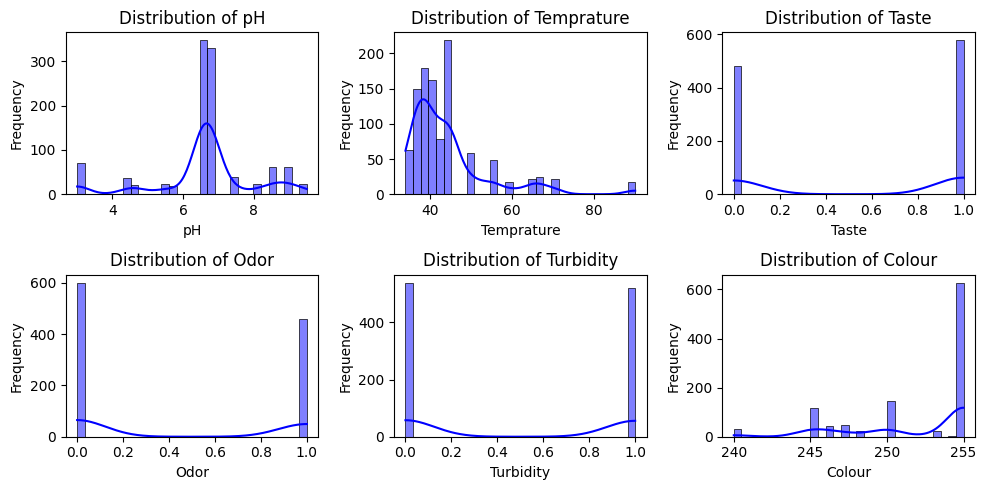

In [80]:

#Mengelompokkan numerical features
numerical_features = ["pH","Temprature","Taste","Odor","Turbidity","Colour"]
# Menentukan tata letak subplot
fig, axes = plt.subplots(2, 3, figsize=(10, 5))

# Menampilkan histogram untuk setiap fitur numerik
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.histplot(df[feature], bins=30, kde=True, color='blue', ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

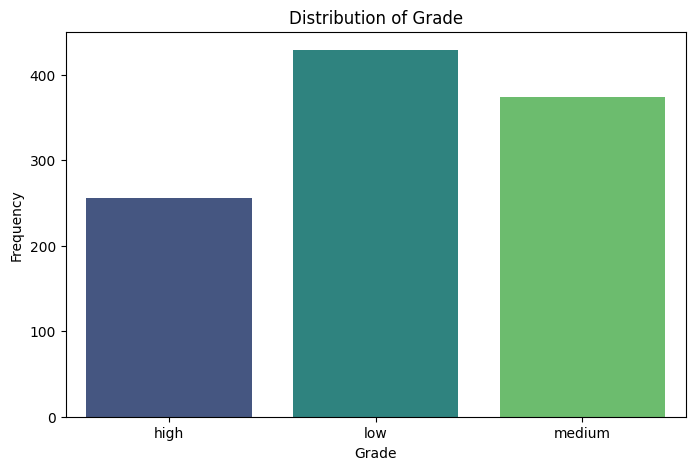

In [89]:
# Menampilkan diagram batang untuk fitur kategori
plt.figure(figsize=(8, 5))
sns.countplot(x=categorical_feature, data=df, palette='viridis')
plt.title(f'Distribution of {categorical_feature}')
plt.xlabel(categorical_feature)
plt.ylabel('Frequency')
plt.show()

## XGBoost

In [216]:
from sklearn.preprocessing import LabelEncoder

data_encoded = pd.get_dummies(df, columns=["pH","Temprature","Taste","Odor","Turbidity","Colour"], drop_first=True)


# Mengonversi fitur kategori menjadi representasi numerik
label_encoder = LabelEncoder()
df[categorical_feature] = label_encoder.fit_transform(df[categorical_feature])

# Memisahkan fitur dan label
X = data_encoded.drop("Grade", axis=1)
y = df["Grade"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
# Inisialisasi XGBoost classifier
model = XGBClassifier(
    n_estimators=50,
    max_depth=1,
)

In [217]:
# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [198]:
# Predict using the classification model
y_pred_classifier = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classifier)
print(f'Accuracy: {accuracy}')

# Display classification report
class_report = classification_report(y_test, y_pred_classifier)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9386792452830188
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        48
           1       0.97      0.97      0.97        78
           2       0.93      0.92      0.92        86

    accuracy                           0.94       212
   macro avg       0.93      0.94      0.94       212
weighted avg       0.94      0.94      0.94       212



In [218]:
# Assuming you have a trained XGBoost model (model) and the user input data
user_input_data = pd.DataFrame({
    'pH': [7],
    'Temprature': [60],
    'Taste': [1],
    'Odor': [0],
    'Turbidity': [0],
    'Colour': [240]
})

# Input data untuk prediksi
input_data = X_train.iloc[[0]]

# Melakukan prediksi menggunakan model yang telah dilatih
prediction = model.predict(input_data)

# Menampilkan hasil prediksi
print(f'Prediction for input data: {prediction[0]}')


Prediction for input data: 2


In [ ]:
2 berarti hasilnya adalah High grade